In [1]:
import pandas as pd
from player import Player
from ratingscraper import *
from scorescraper import *
from estimation import *
from simulations import *

## Generate players

In [3]:
df = pd.read_csv('wcplayers.csv')

In [4]:
players = []
for x in df.iterrows():
    players.append(Player(x[1][0], x[1][1]))

## Web scraping

In [5]:
scrape_ratings(players)

In [6]:
players

[Bu Xiangzhi (2714),
 Peter Svidler (2756),
 Maxime Vachier-Lagrave (2804),
 Alexander Grischuk (2788),
 Vassily Ivanchuk (2727),
 Anish Giri (2777),
 Levon Aronian (2802),
 Daniil Dubov (2666),
 Wesley So (2792),
 Baadur Jobava (2702),
 Vladimir Fedoseev (2731),
 Maxim Rodshtein (2695),
 Evgeniy Najer (2694),
 Richard Rapport (2675),
 Wang Hao (2701),
 Ding Liren (2771)]

In [7]:
playerdict = {player.name: player for player in players}

In [8]:
scrape_scores(players)

Fetching head-to-head score between Bu Xiangzhi and Bu Xiangzhi
Fetching head-to-head score between Bu Xiangzhi and Peter Svidler
Fetching head-to-head score between Bu Xiangzhi and Maxime Vachier-Lagrave
Fetching head-to-head score between Bu Xiangzhi and Alexander Grischuk
Fetching head-to-head score between Bu Xiangzhi and Vassily Ivanchuk
Fetching head-to-head score between Bu Xiangzhi and Anish Giri
Fetching head-to-head score between Bu Xiangzhi and Levon Aronian
Fetching head-to-head score between Bu Xiangzhi and Daniil Dubov
Fetching head-to-head score between Bu Xiangzhi and Wesley So
Fetching head-to-head score between Bu Xiangzhi and Baadur Jobava
Fetching head-to-head score between Bu Xiangzhi and Vladimir Fedoseev
Fetching head-to-head score between Bu Xiangzhi and Maxim Rodshtein
Fetching head-to-head score between Bu Xiangzhi and Evgeniy Najer
Fetching head-to-head score between Bu Xiangzhi and Richard Rapport
Fetching head-to-head score between Bu Xiangzhi and Wang Hao


Fetching head-to-head score between Daniil Dubov and Anish Giri
Fetching head-to-head score between Daniil Dubov and Levon Aronian
Fetching head-to-head score between Daniil Dubov and Daniil Dubov
Fetching head-to-head score between Daniil Dubov and Wesley So
Fetching head-to-head score between Daniil Dubov and Baadur Jobava
Fetching head-to-head score between Daniil Dubov and Vladimir Fedoseev
Fetching head-to-head score between Daniil Dubov and Maxim Rodshtein
Fetching head-to-head score between Daniil Dubov and Evgeniy Najer
Fetching head-to-head score between Daniil Dubov and Richard Rapport
Fetching head-to-head score between Daniil Dubov and Wang Hao
Fetching head-to-head score between Daniil Dubov and Ding Liren
Fetching head-to-head score between Wesley So and Bu Xiangzhi
Fetching head-to-head score between Wesley So and Peter Svidler
Fetching head-to-head score between Wesley So and Maxime Vachier-Lagrave
Fetching head-to-head score between Wesley So and Alexander Grischuk
Fet

Fetching head-to-head score between Wang Hao and Richard Rapport
Fetching head-to-head score between Wang Hao and Wang Hao
Fetching head-to-head score between Wang Hao and Ding Liren
Fetching head-to-head score between Ding Liren and Bu Xiangzhi
Fetching head-to-head score between Ding Liren and Peter Svidler
Fetching head-to-head score between Ding Liren and Maxime Vachier-Lagrave
Fetching head-to-head score between Ding Liren and Alexander Grischuk
Fetching head-to-head score between Ding Liren and Vassily Ivanchuk
Fetching head-to-head score between Ding Liren and Anish Giri
Fetching head-to-head score between Ding Liren and Levon Aronian
Fetching head-to-head score between Ding Liren and Daniil Dubov
Fetching head-to-head score between Ding Liren and Wesley So
Fetching head-to-head score between Ding Liren and Baadur Jobava
Fetching head-to-head score between Ding Liren and Vladimir Fedoseev
Fetching head-to-head score between Ding Liren and Maxim Rodshtein
Fetching head-to-head sc

The scrape_scores() function takes a while to run, because it has to send a request to chessgames.com's slow search. The time complexity is O(n^2), which means it will become significantly faster as the World Cup progresses.

## Simulations

We simulate one World Cup and print out the results by setting the verbosity flag to 1.

In [49]:
W = 10
verbosity = 1
simulate_worldcup(players, 4, W, verbosity)

----------
Round 4
----------
Match Bu Xiangzhi (2714) vs. Peter Svidler (2756)
Game 1: Classical
Draw
Game 2: Classical
Draw
Game 3: Rapid
Peter Svidler won
Game 4: Rapid
Bu Xiangzhi won
Game 5: Rapid
Draw
Game 6: Rapid
Draw
Game 7: Blitz
Peter Svidler won
Game 8: Blitz
Peter Svidler won
Peter Svidler (2756) won the match
Match Maxime Vachier-Lagrave (2804) vs. Alexander Grischuk (2788)
Game 1: Classical
Draw
Game 2: Classical
Alexander Grischuk won
Alexander Grischuk (2788) won the match
Match Vassily Ivanchuk (2727) vs. Anish Giri (2777)
Game 1: Classical
Anish Giri won
Game 2: Classical
Draw
Anish Giri (2777) won the match
Match Levon Aronian (2802) vs. Daniil Dubov (2666)
Game 1: Classical
Draw
Game 2: Classical
Draw
Game 3: Rapid
Levon Aronian won
Game 4: Rapid
Levon Aronian won
Levon Aronian (2802) won the match
Match Wesley So (2792) vs. Baadur Jobava (2702)
Game 1: Classical
Wesley So won
Game 2: Classical
Wesley So won
Wesley So (2792) won the match
Match Vladimir Fedoseev (2

Wesley So (2792)

Now we run 10,000 simulations instead (without printing!) and display the results.

In [59]:
N = 10000
W = 10
verbosity = 0
simulated_players = worldcup_simulations(players, 3, N, W, verbosity)
for player in simulated_players:
    print(player, round(player.win_percentage*100, 3), "%")

Wesley So (2792) 24.34 %
Levon Aronian (2802) 18.43 %
Maxime Vachier-Lagrave (2804) 15.78 %
Alexander Grischuk (2788) 8.06 %
Ding Liren (2771) 8.05 %
Peter Svidler (2756) 6.22 %
Anish Giri (2777) 4.85 %
Vassily Ivanchuk (2727) 4.48 %
Vladimir Fedoseev (2731) 3.66 %
Wang Hao (2701) 2.52 %
Richard Rapport (2675) 1.37 %
Bu Xiangzhi (2714) 0.67 %
Maxim Rodshtein (2695) 0.54 %
Evgeniy Najer (2694) 0.54 %
Baadur Jobava (2702) 0.32 %
Daniil Dubov (2666) 0.17 %


## Plotting

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
def plot_winner_predictions(players):
    names = [player.name.split(" ")[-1] for player in players]
    win_percentages = [player.win_percentage for player in players]
    player_df = pd.DataFrame({"Name": names, "Win percentage": win_percentages})

    matplotlib.rcParams['figure.figsize'] = (16, 10)
    matplotlib.rcParams['font.size'] = 40
    sns.barplot(x="Name", y="Win percentage", data=player_df[player_df["Win percentage"]>0.01]).set_title("World Cup 2017 Winner Predictions")

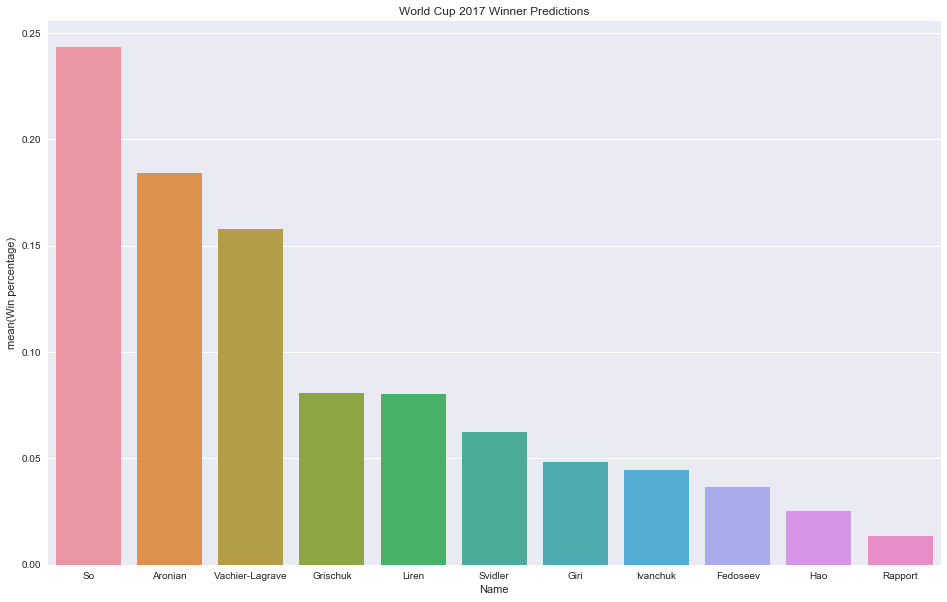

In [62]:
plot_winner_predictions(simulated_players)

This sets the current round scores of the players:

In [63]:
playerdict["Bu Xiangzhi"].current_score = 1
playerdict["Levon Aronian"].current_score = 10
playerdict["Daniil Dubov"].current_score = 0
playerdict["Vladimir Fedoseev"].current_score = 1
playerdict["Baadur Jobava"].current_score = 1
playerdict["Maxim Rodshtein"].current_score = 1
playerdict["Vassily Ivanchuk"].current_score = 10
playerdict["Wang Hao"].current_score = 0
playerdict["Evgeniy Najer"].current_score = 1
playerdict["Alexander Grischuk"].current_score = 1
playerdict["Richard Rapport"].current_score = 1
playerdict["Anish Giri"].current_score = 0
playerdict["Wesley So"].current_score = 1
playerdict["Peter Svidler"].current_score = 1
playerdict["Maxime Vachier-Lagrave"].current_score = 1
playerdict["Ding Liren"].current_score = 10

In [64]:
N = 10000
W = 10
verbosity = 0
simulated_players = worldcup_simulations(players, 4, N, W, verbosity)
for player in simulated_players:
    print(player, round(player.win_percentage*100, 3), "%")

Wesley So (2792) 25.41 %
Levon Aronian (2802) 16.66 %
Maxime Vachier-Lagrave (2804) 15.47 %
Ding Liren (2771) 12.62 %
Vassily Ivanchuk (2727) 9.81 %
Alexander Grischuk (2788) 7.37 %
Peter Svidler (2756) 5.73 %
Vladimir Fedoseev (2731) 3.72 %
Richard Rapport (2675) 1.79 %
Bu Xiangzhi (2714) 0.72 %
Maxim Rodshtein (2695) 0.39 %
Evgeniy Najer (2694) 0.17 %
Baadur Jobava (2702) 0.14 %
Anish Giri (2777) 0.0 %
Daniil Dubov (2666) 0.0 %
Wang Hao (2701) 0.0 %


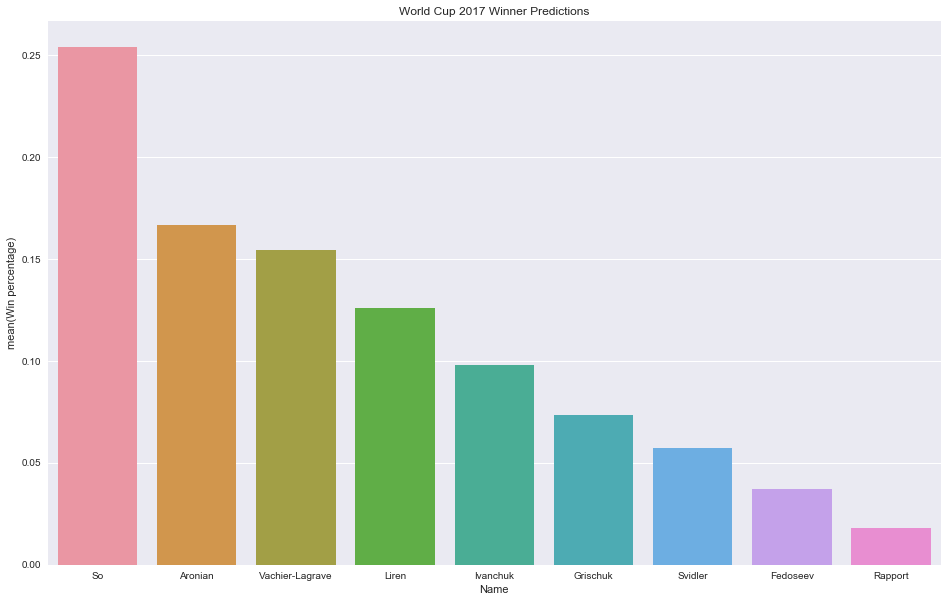

In [65]:
plot_winner_predictions(simulated_players)

In [51]:
worldcup_match_simulations(playerdict["Bu Xiangzhi"], playerdict["Peter Svidler"], W, 10000, 0)

Bu Xiangzhi (2714) 0.27
Peter Svidler (2756) 0.73


In [52]:
worldcup_match_simulations(playerdict["Maxime Vachier-Lagrave"], playerdict["Alexander Grischuk"], W, 10000, 0)

Maxime Vachier-Lagrave (2804) 0.5789
Alexander Grischuk (2788) 0.4211


In [53]:
worldcup_match_simulations(playerdict["Vassily Ivanchuk"], playerdict["Anish Giri"], W, 10000, 0)

Vassily Ivanchuk (2727) 1.0
Anish Giri (2777) 0.0


In [54]:
worldcup_match_simulations(playerdict["Daniil Dubov"], playerdict["Levon Aronian"], W, 10000, 0)

Daniil Dubov (2666) 0.0
Levon Aronian (2802) 1.0


In [55]:
worldcup_match_simulations(playerdict["Wesley So"], playerdict["Baadur Jobava"], W, 10000, 0)

Wesley So (2792) 0.9513
Baadur Jobava (2702) 0.0487


In [56]:
worldcup_match_simulations(playerdict["Maxim Rodshtein"], playerdict["Vladimir Fedoseev"], W, 10000, 0)

Maxim Rodshtein (2695) 0.2825
Vladimir Fedoseev (2731) 0.7175


In [57]:
worldcup_match_simulations(playerdict["Evgeniy Najer"], playerdict["Richard Rapport"], W, 10000, 0)

Evgeniy Najer (2694) 0.2093
Richard Rapport (2675) 0.7907


In [58]:
worldcup_match_simulations(playerdict["Wang Hao"], playerdict["Ding Liren"], W, 10000, 0)

Wang Hao (2701) 0.0
Ding Liren (2771) 1.0


In [37]:
playerdict["Wesley So"].scores["Classical"]["Baadur Jobava"] = [2,0,2]
playerdict["Wesley So"].scores["RapidBlitz"]["Baadur Jobava"] = [5,0,2]
playerdict["Wesley So"].scores["Classical"]["Maxim Rodshtein"] = [1,0,2]
playerdict["Wesley So"].scores["RapidBlitz"]["Maxim Rodshtein"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Richard Rapport"] = [2,0,0]
playerdict["Wesley So"].scores["RapidBlitz"]["Richard Rapport"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Ding Liren"] = [1,2,11]
playerdict["Wesley So"].scores["RapidBlitz"]["Richard Rapport"] = [2,2,12]
playerdict["Wesley So"].scores["Classical"]["Peter Svidler"] = [0,0,4]
playerdict["Wesley So"].scores["RapidBlitz"]["Peter Svidler"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Bu Xiangzhi"] = [0,0,1]
playerdict["Wesley So"].scores["RapidBlitz"]["Bu Xiangzhi"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Maxime Vachier-Lagrave"] = [1,4,9]
playerdict["Wesley So"].scores["RapidBlitz"]["Maxime Vachier-Lagrave"] = [2,10,15]
playerdict["Wesley So"].scores["Classical"]["Alexander Grischuk"] = [1,0,0]
playerdict["Wesley So"].scores["RapidBlitz"]["Alexander Grischuk"] = [2,0,2]
playerdict["Wesley So"].scores["Classical"]["Vassily Ivanchuk"] = [2,0,4]
playerdict["Wesley So"].scores["RapidBlitz"]["Vassily Ivanchuk"] = [2,0,7]
playerdict["Wesley So"].scores["Classical"]["Levon Aronian"] = [1,3,5]
playerdict["Wesley So"].scores["RapidBlitz"]["Levon Aronian"] = [3,5,11]